# ECON 220 Lab - Week 8

Justin S. Eloriaga

Today, we will use a relatively "big" dataset and learn how to download, clean, process, and analyze bigger than average data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let us first download the dataset from IPUMS USA.

In [2]:
path = "/Users/justineloriaga/Documents/GitHub/ECON-220-Lab/Week 8/usa_00001.csv"
data = pd.read_csv(path)
data

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,HHINCOME,PERNUM,PERWT,RACE,RACED,SCHOOL,EDUC,EDUCD,SCHLTYPE,INCTOT
0,2023,202301,1,2023010000113,6.0,2023000000011,280201,3,9999999,1,6.0,2,200,1,6,63,1,11500
1,2023,202301,2,2023010000180,27.0,2023000000021,10001,3,9999999,1,27.0,1,100,1,6,63,1,0
2,2023,202301,3,2023010000181,47.0,2023000000031,40201,4,9999999,1,47.0,1,100,2,7,71,3,0
3,2023,202301,4,2023010000250,11.0,2023000000041,270201,3,9999999,1,11.0,2,200,2,2,26,2,9999999
4,2023,202301,5,2023010000340,57.0,2023000000051,280201,4,9999999,1,57.0,1,100,2,6,65,2,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405804,2023,202301,1519008,2023001457972,77.0,2023015190081,30056,1,145000,1,78.0,1,100,1,11,114,1,80000
3405805,2023,202301,1519008,2023001457972,77.0,2023015190081,30056,1,145000,2,62.0,1,100,1,10,101,1,65000
3405806,2023,202301,1519009,2023001458196,75.0,2023015190091,20056,1,75000,1,76.0,1,100,1,10,101,1,75000
3405807,2023,202301,1519010,2023001459187,37.0,2023015190101,10056,1,43600,1,37.0,1,100,1,6,65,1,23000


As you can see, it took quite a bit of time to load. That's because we have roughly 3,405,809 people/individuals in this national dataset. 

In [3]:
# Describe the data
data.describe()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,HHINCOME,PERNUM,PERWT,RACE,RACED,SCHOOL,EDUC,EDUCD,SCHLTYPE,INCTOT
count,3405809.0,3405809.0,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06
mean,2023.0,202301.0,7.589917e+05,2.023001e+12,9.723818e+01,2.023008e+12,4.888102e+05,1.134287e+00,6.386922e+05,2.057684e+00,9.833637e+01,2.535423e+00,2.579036e+02,1.191066e+00,6.411226e+00,6.656684e+01,1.234843e+00,1.563316e+06
std,0.0,0.0,4.414736e+05,2.111813e+06,8.743515e+01,4.414736e+06,8.443947e+05,5.784842e-01,2.188739e+06,1.331731e+00,8.923316e+01,2.607952e+00,2.679706e+02,4.556674e-01,3.260914e+00,3.246812e+01,5.659658e-01,3.571338e+06
min,2023.0,202301.0,1.000000e+00,2.023000e+12,1.000000e+00,2.023000e+12,1.000100e+04,1.000000e+00,-1.680000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.230000e+04
25%,2023.0,202301.0,3.723860e+05,2.023000e+12,4.800000e+01,2.023004e+12,1.000050e+05,1.000000e+00,5.400000e+04,1.000000e+00,4.700000e+01,1.000000e+00,1.000000e+02,1.000000e+00,6.000000e+00,6.100000e+01,1.000000e+00,1.300000e+04
50%,2023.0,202301.0,7.568300e+05,2.023001e+12,7.100000e+01,2.023008e+12,2.312480e+05,1.000000e+00,1.001000e+05,2.000000e+00,7.200000e+01,1.000000e+00,1.000000e+02,1.000000e+00,6.000000e+00,6.500000e+01,1.000000e+00,4.120000e+04
75%,2023.0,202301.0,1.147002e+06,2.023001e+12,1.150000e+02,2.023011e+12,4.801480e+05,1.000000e+00,1.764000e+05,3.000000e+00,1.170000e+02,2.000000e+00,2.000000e+02,1.000000e+00,1.000000e+01,1.010000e+02,1.000000e+00,1.041900e+05
max,2023.0,202301.0,1.519010e+06,2.023010e+12,2.225000e+03,2.023015e+12,8.100351e+06,5.000000e+00,9.999999e+06,2.000000e+01,2.225000e+03,9.000000e+00,9.900000e+02,2.000000e+00,1.100000e+01,1.160000e+02,3.000000e+00,9.999999e+06


Let's do a histogram of the variable SCHLTYPE

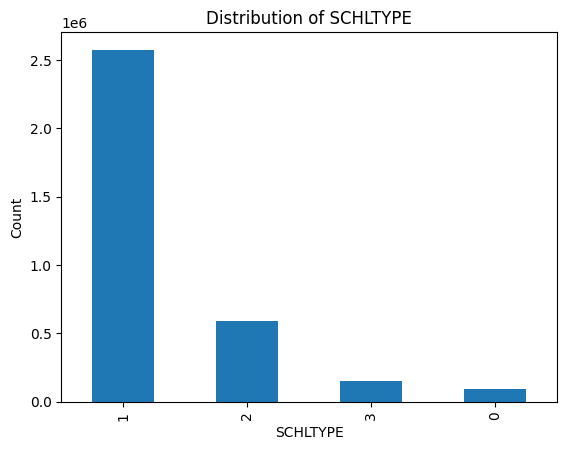

In [4]:
data['SCHLTYPE'].value_counts().plot(kind='bar', title='Distribution of SCHLTYPE')
plt.xlabel('SCHLTYPE')
plt.ylabel('Count')
plt.show()

What does 1, 2, 3, 0 mean? Look at the codebook! The variable SCHLTYPE determines whether the person is in a Public or private school. 0 is the value for N/A. 1 is the value for not-enrolled. 2 is the value for a public school. 3 is the value for a Private school. 

<Axes: title={'center': 'Distribution of SCHLTYPE'}, xlabel='SCHLTYPE'>

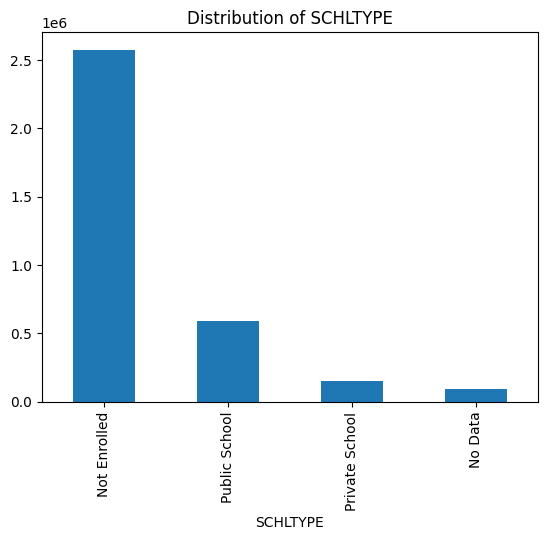

In [5]:
data['SCHLTYPE'] = data['SCHLTYPE'].replace({
    0: "No Data",
    1: "Not Enrolled",
    2: "Public School",
    3: "Private School"
})
data

data['SCHLTYPE'].value_counts().plot(kind = 'bar', title = 'Distribution of SCHLTYPE')

Now, let's look at some anomalous values that may potentially exist.

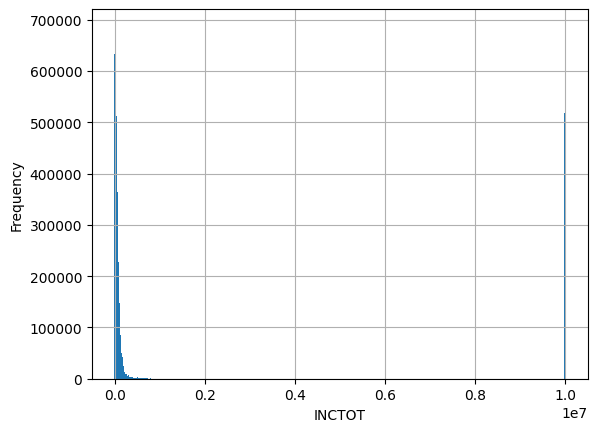

In [6]:
data['INCTOT'].hist(bins=500)
plt.xlabel('INCTOT')
plt.ylabel('Frequency')
plt.show()

There really is no standard way to deal with outlying observations. For now, let us just try one ad hoc approach

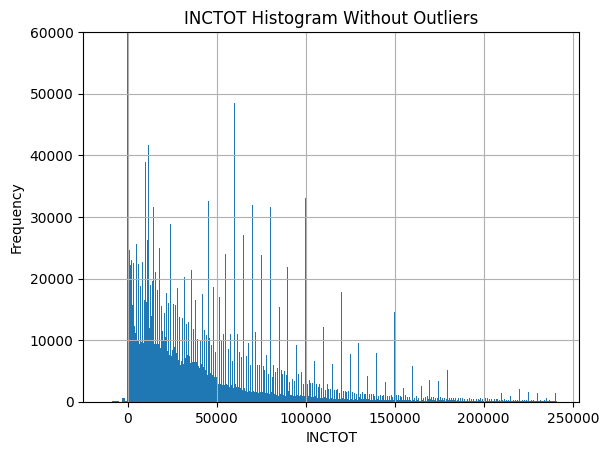

In [14]:
# Calculate Q1, Q3, and IQR
Q1 = data['INCTOT'].quantile(0.25)
Q3 = data['INCTOT'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
filtered_data = data[(data['INCTOT'] >= lower_bound) & (data['INCTOT'] <= upper_bound)]

# Plot the histogram again
filtered_data['INCTOT'].hist(bins=500)
plt.xlabel('INCTOT')
plt.ylabel('Frequency')
plt.ylim(0, 60000)
plt.title('INCTOT Histogram Without Outliers')
plt.show()

There's still some outliers, particularly 0 income and also the negatives. Although plausible, let us take it out. 

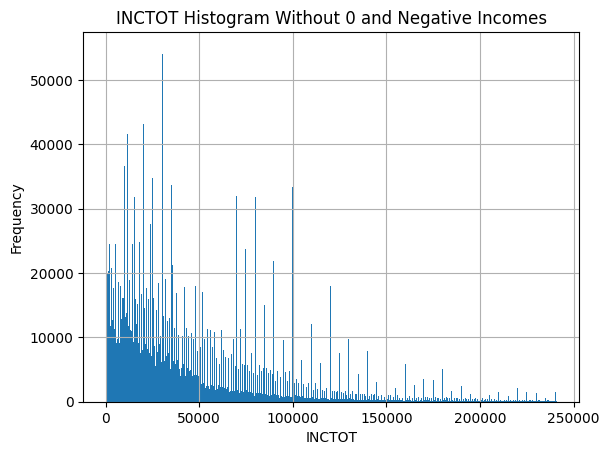

In [15]:
# Filter out rows with 0 or negative incomes
positive_income_data = filtered_data[filtered_data['INCTOT'] > 0]

# Plot the histogram again
positive_income_data['INCTOT'].hist(bins=500)
plt.xlabel('INCTOT')
plt.ylabel('Frequency')
plt.title('INCTOT Histogram Without 0 and Negative Incomes')
plt.show()

Let us now get a random sample from this filtered dataset.

In [23]:
random_sample = positive_income_data.sample(n=300, random_state=30)
random_sample

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,HHINCOME,PERNUM,PERWT,RACE,RACED,SCHOOL,EDUC,EDUCD,SCHLTYPE,INCTOT
1768371,2023,202301,788031,2023000782326,33.0,2023007880311,200229,1,85600,1,33.0,1,100,1,7,71,Not Enrolled,54000
3335370,2023,202301,1486405,2023001296081,62.0,2023014864051,90054,1,120000,1,62.0,1,100,1,6,63,Not Enrolled,55000
482399,2023,202301,207409,2023001156775,120.0,2023002074091,651406,1,128000,1,120.0,7,700,1,3,30,Not Enrolled,98000
1625037,2023,202301,721830,2023001189410,188.0,2023007218301,140026,1,121200,6,138.0,1,100,1,6,63,Not Enrolled,15000
495186,2023,202301,212173,2023001206338,198.0,2023002121731,970506,1,126800,1,199.0,1,100,1,6,65,Not Enrolled,126800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958552,2023,202301,1328178,2023000723562,51.0,2023013281781,230148,1,130000,1,51.0,1,100,1,6,63,Not Enrolled,70000
900112,2023,202301,396458,2023000057762,51.0,2023003964581,470213,1,76500,2,58.0,8,802,1,6,64,Not Enrolled,22500
283760,2023,202301,132854,2023000379611,36.0,2023001328541,410306,1,186600,1,36.0,1,100,1,8,81,Not Enrolled,12700
1007998,2023,202301,440643,2023000608095,186.0,2023004406431,30415,1,100000,1,186.0,2,200,1,11,115,Not Enrolled,100000


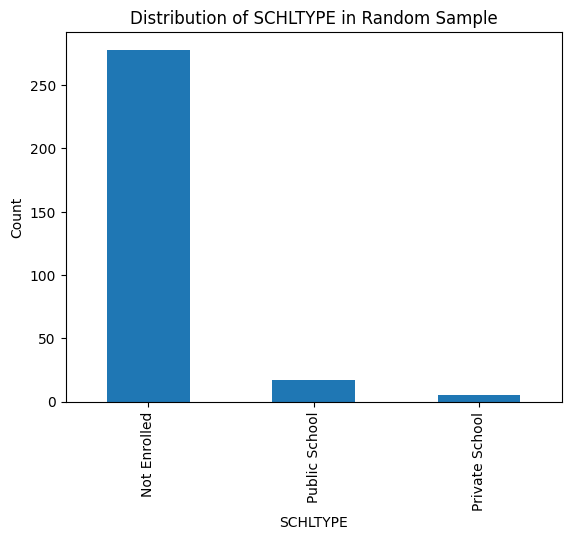

In [24]:
random_sample['SCHLTYPE'].value_counts().plot(kind='bar', title='Distribution of SCHLTYPE in Random Sample')
plt.xlabel('SCHLTYPE')
plt.ylabel('Count')
plt.show()

In [25]:
# Filter out rows where SCHLTYPE is "Not Enrolled"
enrolled_data = positive_income_data[positive_income_data['SCHLTYPE'].isin(['Public School', 'Private School'])]

# Compute the mean INCTOT for Public School and Private School
mean_inctot = enrolled_data.groupby('SCHLTYPE')['INCTOT'].mean()
print(mean_inctot)

SCHLTYPE
Private School    26312.427345
Public School     22119.912597
Name: INCTOT, dtype: float64


In [27]:
differences = []

for _ in range(100):
    # Generate a random sample of 300
    random_sample = positive_income_data.sample(n=300, random_state=None)
    
    # Filter out rows where SCHLTYPE is "Not Enrolled"
    enrolled_sample = random_sample[random_sample['SCHLTYPE'].isin(['Public School', 'Private School'])]
    
    # Compute the mean INCTOT for Public School and Private School
    mean_inctot_sample = enrolled_sample.groupby('SCHLTYPE')['INCTOT'].mean()
    
    # Compute the difference in mean income
    if 'Public School' in mean_inctot_sample and 'Private School' in mean_inctot_sample:
        difference = mean_inctot_sample['Private School'] - mean_inctot_sample['Public School']
        differences.append(difference)

# Print the differences
print(differences)
# Calculate and display the mean difference
mean_difference = np.mean(differences)
print(f"Mean Difference: {mean_difference}")

[np.float64(16801.428571428572), np.float64(-18809.583333333332), np.float64(-25695.714285714286), np.float64(12876.190476190477), np.float64(2124.833333333332), np.float64(9136.956521739132), np.float64(-8129.8245614035095), np.float64(-4089.803921568626), np.float64(-12504.347826086956), np.float64(6807.391304347828), np.float64(15717.75), np.float64(26637.06896551724), np.float64(12201.666666666668), np.float64(-9947.619047619046), np.float64(-12905.846153846152), np.float64(-17715.0), np.float64(-1597.5), np.float64(50200.38461538462), np.float64(-4268.461538461539), np.float64(4723.529411764706), np.float64(-13605.128205128207), np.float64(10273.369565217392), np.float64(49519.73333333334), np.float64(12397.777777777777), np.float64(-11479.047619047618), np.float64(-24543.61111111111), np.float64(-800.0), np.float64(15619.966555183946), np.float64(14175.595238095237), np.float64(22560.0), np.float64(-20237.681159420288), np.float64(-16560.0), np.float64(8024.5021645021625), np.flo